In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

df = pd.read_csv("pb_gaussian_mean.csv")

In [2]:
list_of_n = df.n.unique()
print(list_of_n)
estimates_std = []
standard_error = []

for n_val in list_of_n:
    estimates_std.append(np.std(df.loc[df.n==n_val, :]['estimator_mean']))
    standard_error.append(np.mean(df.loc[df.n==n_val, :]['estimator_variance']))

[ 250  500  750 1000 2500]


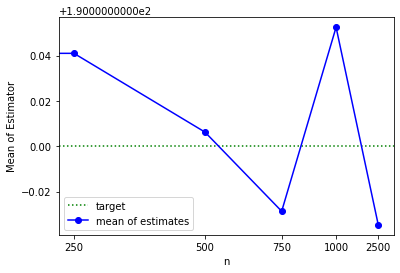

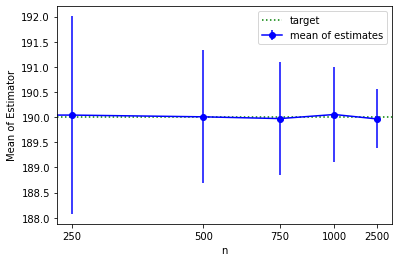

In [3]:
true_theta = 190
point_estimates = []
for n_val in list_of_n:
    point_estimates.append(np.mean(df.loc[df.n==n_val, :]['estimator_mean']))

#plot is cutting off first datapoint. Hardcoding the first "throwaway" datapoint
list_of_n_new = list_of_n.copy()
list_of_n_new=np.insert(list_of_n_new,0,0)

point_estimates_new = point_estimates.copy()
point_estimates_new.insert(0,190)
estimates_std_new = estimates_std.copy()
estimates_std_new.insert(0,0)

plt.xscale('log')
plt.axhline(y=true_theta, color='green', linestyle=':', label = 'target')
plt.plot([str(e) for e in list_of_n_new], point_estimates_new, 
     marker='o', color='blue', label='mean of estimates')
plt.xlabel("n")
plt.ylabel("Mean of Estimator")
plt.legend()
plt.show()

plt.xscale('log')
plt.axhline(y=true_theta, color='green', linestyle=':', label = 'target')
plt.errorbar([str(e) for e in list_of_n_new], point_estimates_new, 
     marker='o', color='blue', label='mean of estimates', yerr=estimates_std_new)
plt.xlabel("n")
plt.ylabel("Mean of Estimator")
plt.legend()
plt.show()

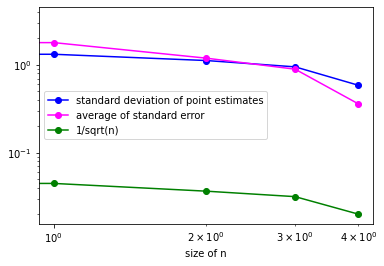

In [10]:
plt.plot([str(e) for e in list_of_n], estimates_std, 
         marker='o', color='blue', label='standard deviation of point estimates')
plt.plot([str(e) for e in list_of_n], standard_error, 
         marker='o', color='magenta', label='average of standard error')
plt.plot([str(e) for e in list_of_n], [(1/(np.sqrt(e))) for e in list_of_n], 
         marker='o', color='green', label='1/sqrt(n)')
plt.xlabel("size of n")
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

In [4]:
def construct_ci(alpha):

    ci_success_over_n = []

    true_theta = 190


    index = 0
    for n_val in list_of_n:
        ci_success_trials = np.zeros(1000) #T
        for i in range(1000):
            theta = (df.loc[df.n==n_val, :]['estimator_mean'])[index]
            sigma_sq = (df.loc[df.n==n_val, :]['estimator_variance'])[index]
            index += 1        

            ci = st.norm.interval(alpha, loc=theta, scale=np.sqrt(sigma_sq))
            if ci[0] <= true_theta <= ci[1]:
                ci_success_trials[i] = 1
        ci_success_over_n.append(np.mean(ci_success_trials))        
        
#     plt.xscale('log')
    plt.axhline(y=alpha, color='green', linestyle=':', label = 'target')
    plt.plot([str(e) for e in list_of_n], ci_success_over_n, 
                 marker='o', color='blue', label='CI success rate')
    plt.xlabel("n")
    plt.ylabel("CI Success Rate")
    plt.legend()
    plt.show()

    return(ci_success_over_n)

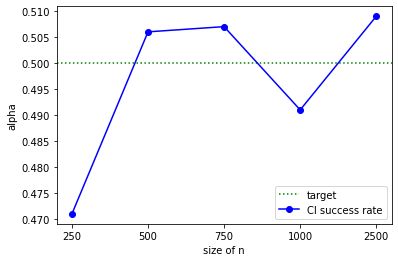

[0.471, 0.506, 0.507, 0.491, 0.509]


In [12]:
print(construct_ci(.50))

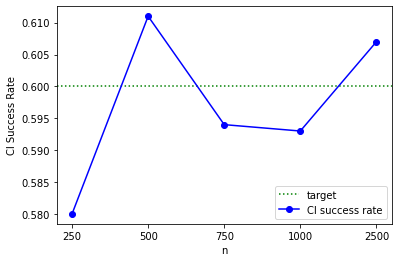

[0.58, 0.611, 0.594, 0.593, 0.607]


In [5]:
print(construct_ci(.60))

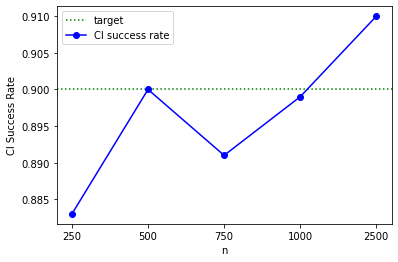

[0.883, 0.9, 0.891, 0.899, 0.91]


In [6]:
print(construct_ci(.90))